### —🦙S T A R T E R

🐞 I M P O R T S

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # for data visualizations
from sklearn.utils import resample # for upsampling and undersampling i imported this 

In [2]:
# reading a csv file and transfering it to dataframe
data = pd.read_csv("bank-additional-full.csv", sep=";")
df = pd.DataFrame(data)

🐞 I N F O S

In [3]:
# getting information about the dataframe
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [4]:
# getting information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
# turning all "unknows" into nan type so that i can drop nan values 
df.replace("unknown", np.nan, inplace=True)

In [6]:
# checking on them
df.isna().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [7]:
# Fill missing values with the mode for each column
for column in df.columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

C:\Users\Geerdoo\AppData\Local\Temp\ipykernel_9824\79233874.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)
C:\Users\Geerdoo\AppData\Local\Temp\ipykernel_9824\79233874.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

✿ 🔖 H E A D — T A I L

In [8]:
# head 
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [9]:
# tail
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


✿ 🔖 G E T T I N G - T O - K N O W - T H E - D A T A

In [10]:
# how many colmuns and rows we got ? 41188 rows and 21 colmuns

print(df.shape)

(41188, 21)


In [11]:
# what are the types of our colmun' values

print(df.dtypes)

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


### —🐲 T R A N S F E R I N G - C A T E G O R I C A R L S & O N E - H O T - E N C O D I N G

##### —🦩T R A N S F E R I N G

###### ✿ 🔖 T R A N S F E R I N G — "J O B"

In [14]:
# for understanding the unique values for job colmun
df["job"].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed',
       'entrepreneur', 'student'], dtype=object)

In [15]:
df["job"].replace (
    {
    'unknown' : np.nan
    },
inplace=True)

In [16]:
df.dropna(subset=['job'], inplace=True)

In [17]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [18]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


###### ✿ 🔖 T R A N S F E R I N G — "M A R T I A L"

In [19]:
df["marital"].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [20]:
df['marital'].replace(
    {
        'unknown':np.nan
    },
inplace=True)

C:\Users\Geerdoo\AppData\Local\Temp\ipykernel_18668\3668699528.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['marital'].replace(


In [21]:
df.dropna(subset=['marital'], inplace=True)

In [22]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [23]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


###### ✿ 🔖 T R A N S F E R I N G — "E D U C A T I O N"

In [24]:
df["education"].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'university.degree', 'illiterate'],
      dtype=object)

In [25]:
df["education"].replace(
    {
        'unknown':np.nan,
    },
inplace=True)

C:\Users\Geerdoo\AppData\Local\Temp\ipykernel_18668\3632920210.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["education"].replace(


In [26]:
df.dropna(subset=['education'], inplace=True)

In [27]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


###### ✿ 🔖 T R A N S F E R I N G — "D E F A U L T"

In [28]:
df["default"].unique()

array(['no', 'yes'], dtype=object)

In [29]:
df["default"].replace(
    {
        'no' : 0,
        'yes' : 1
    },
inplace=True
)

C:\Users\Geerdoo\AppData\Local\Temp\ipykernel_18668\2093927347.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["default"].replace(
C:\Users\Geerdoo\AppData\Local\Temp\ipykernel_18668\2093927347.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["default"].replace(


In [30]:
df.dropna(subset=['default'], inplace=True)

In [31]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,0,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,0,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,0,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,0,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [32]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,0,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,0,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,0,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,0,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,0,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


###### ✿ 🔖 T R A N S F E R I N G — "H O U S I N G"

In [33]:
df['housing'].unique()

array(['no', 'yes'], dtype=object)

In [34]:
df["housing"].replace(
    {
    'no': 0,
    'yes': 1
    },
inplace=True)

C:\Users\Geerdoo\AppData\Local\Temp\ipykernel_18668\1739898009.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["housing"].replace(
C:\Users\Geerdoo\AppData\Local\Temp\ipykernel_18668\1739898009.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["housing"].replace(


In [35]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0,0,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,0,0,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,0,1,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,0,0,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,0,0,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [36]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,0,1,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,0,0,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,0,1,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,0,0,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,0,1,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


###### ✿ 🔖 T R A N S F E R I N G — "L O A N"

In [37]:
df['loan'].unique()

array(['no', 'yes'], dtype=object)

In [38]:
df['loan'].replace({
    'no': 0,
    'yes': 1
    },
inplace=True)

C:\Users\Geerdoo\AppData\Local\Temp\ipykernel_18668\2819618607.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['loan'].replace({
C:\Users\Geerdoo\AppData\Local\Temp\ipykernel_18668\2819618607.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['loan'].replace({


In [39]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,0,1,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,0,0,1,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [40]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,0,1,0,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,0,0,0,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,0,1,0,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,0,0,0,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,0,1,0,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


###### ✿ 🔖 T R A N S F E R I N G — "C O N T A C T"

In [41]:
df['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

In [42]:
df['contact'].replace(
    {
        'telephone': 0,
        'cellular': 1
    },
inplace=True)

C:\Users\Geerdoo\AppData\Local\Temp\ipykernel_18668\1173581591.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['contact'].replace(
C:\Users\Geerdoo\AppData\Local\Temp\ipykernel_18668\1173581591.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['contact'].replace(


In [43]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0,0,0,0,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,0,0,0,0,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,0,1,0,0,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,0,0,0,0,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,0,0,1,0,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [44]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,0,1,0,1,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,0,0,0,1,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,0,1,0,1,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,0,0,0,1,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,0,1,0,1,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


###### ✿ 🔖 T R A N S F E R I N G — "M O N T H"

In [45]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [46]:
df['month'].replace(
    {
        'unknown': np.nan
    },
inplace=True)

C:\Users\Geerdoo\AppData\Local\Temp\ipykernel_18668\661917565.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['month'].replace(


In [47]:
df.dropna(subset=['month'], inplace=True)

In [48]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0,0,0,0,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,0,0,0,0,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,0,1,0,0,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,0,0,0,0,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,0,0,1,0,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [49]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,0,1,0,1,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,0,0,0,1,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,0,1,0,1,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,0,0,0,1,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,0,1,0,1,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


###### ✿ 🔖 T R A N S F E R I N G — "D A Y - O F - W E E K"

In [50]:
df['day_of_week'].unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [51]:
df['day_of_week'].replace(
    {
        'unknown': np.nan
    },
inplace=True)

C:\Users\Geerdoo\AppData\Local\Temp\ipykernel_18668\576322771.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['day_of_week'].replace(


In [52]:
df.dropna(subset=['day_of_week'], inplace=True)

In [53]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0,0,0,0,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,0,0,0,0,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,0,1,0,0,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,0,0,0,0,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,0,0,1,0,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [54]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,0,1,0,1,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,0,0,0,1,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,0,1,0,1,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,0,0,0,1,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,0,1,0,1,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


###### ✿ 🔖 T R A N S F E R I N G — "P O U T C O M E"

In [55]:
df['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [56]:
df['poutcome'].replace(
    {
        'unknown' : np.nan
    },
inplace=True)

C:\Users\Geerdoo\AppData\Local\Temp\ipykernel_18668\2133172584.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['poutcome'].replace(


In [57]:
df.dropna(subset=['poutcome'], inplace=True)

In [58]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0,0,0,0,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,0,0,0,0,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,0,1,0,0,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,0,0,0,0,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,0,0,1,0,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [59]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,0,1,0,1,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,0,0,0,1,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,0,1,0,1,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,0,0,0,1,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,0,1,0,1,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


###### ✿ 🔖 T R A N S F E R I N G — "Y"

In [60]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

In [61]:
# df['y'].replace (
#     {
#         'no' : 0,
#         'yes': 1
#     },
# inplace=True)

In [62]:
df.dropna(subset=['y'], inplace=True)

In [63]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0,0,0,0,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,0,0,0,0,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,0,1,0,0,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,0,0,0,0,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,0,0,1,0,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [64]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,0,1,0,1,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,0,0,0,1,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,0,1,0,1,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,0,0,0,1,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,0,1,0,1,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [65]:
df.describe()

,age,default,housing,loan,contact,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,0.000073,0.547878,0.151695,0.634748,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,0.008534,0.497708,0.358729,0.481507,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,0.000000,0.000000,0.000000,0.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,0.000000,1.000000,0.000000,1.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,0.000000,1.000000,0.000000,1.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,1.000000,1.000000,1.000000,1.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  int64  
 5   housing         41188 non-null  int64  
 6   loan            41188 non-null  int64  
 7   contact         41188 non-null  int64  
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

##### —🦩O N E - H O T - E N C O D I N G

In [67]:
df = pd.get_dummies(df, columns=['job', 'marital', 'education', 'month', 'day_of_week', 'poutcome'], dtype=int)

### —🎀S T A N D A R D A T I O N I N G - N U M E R I C A L - V A L U E S

In [68]:
from sklearn.preprocessing import StandardScaler

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()

df[numeric_columns] = scaler.fit_transform(df[numeric_columns])


### —🐡R E M O V I N G - O U T L I E R S

In [ ]:
# importing necessary libraries for removing outliers
import seaborn as sns
from scipy import stats
from scipy.stats import zscore

In [ ]:
# # Identify and remove outliers using Z-score
# numerical_cols = df.select_dtypes(include=[np.number]).columns
# z_scores = np.abs(stats.zscore(df[numerical_cols]))
# df = df[(z_scores < 3).all(axis=1)]

In [ ]:
df.head()

In [ ]:
df.describe()

In [ ]:
df.info()

### —🪴C H E C K I N G - O N - I M B A L A N C E S

In [69]:
# check for class imbalance
import seaborn as sns
class_counts = df['y'].value_counts()
print("before balancing:")
print(class_counts)

before balancing:
y
no     36548
yes     4640
Name: count, dtype: int64


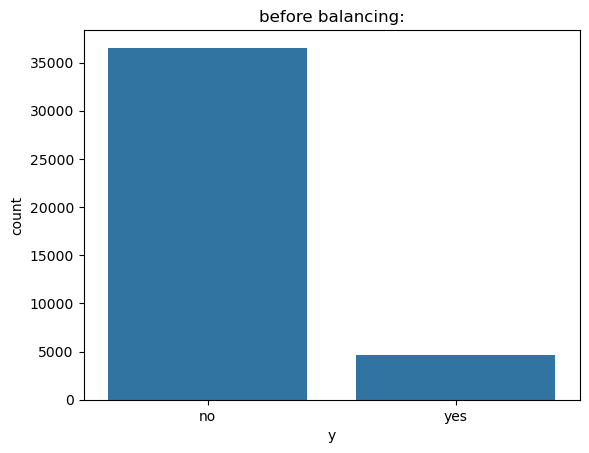

In [70]:
sns.countplot(x='y', data=df)
plt.title("before balancing:")
plt.show()

In [71]:
df['y'].replace (
    {
        'no' : 0,
        'yes': 1
    },
inplace=True)

C:\Users\Geerdoo\AppData\Local\Temp\ipykernel_18668\3332812109.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['y'].replace (
C:\Users\Geerdoo\AppData\Local\Temp\ipykernel_18668\3332812109.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['y'].replace (


In [72]:
# Separate majority and minority classes
df_majority = df[df['y'] == 0]
df_minority = df[df['y'] == 1]

print(f"Majority class count: {len(df_majority)}")
print(f"Minority class count: {len(df_minority)}")

Majority class count: 36548
Minority class count: 4640


In [73]:
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),  # to match majority class
                                 random_state=42)  # reproducible results

In [74]:
# Combine majority class with upsampled minority class
df_balanced = pd.concat([df_majority, df_minority_upsampled])

In [75]:
print("after balancing:")
print(df_balanced['y'].value_counts())

after balancing:
y
0    36548
1    36548
Name: count, dtype: int64


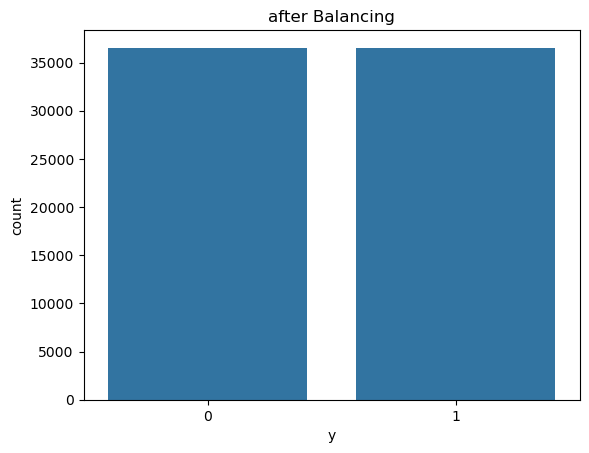

In [76]:
sns.countplot(x='y', data=df_balanced)
plt.title('after Balancing')
plt.show()

In [77]:
from sklearn.preprocessing import StandardScaler

numeric_columns = df_balanced.select_dtypes(include=['float64', 'int64' , 'int32']).columns

scaler = StandardScaler()

df_balanced[numeric_columns] = scaler.fit_transform(df_balanced[numeric_columns])


### —🔖T U R N I N G - D F - T O - A - N E W - C S V - F I L E

In [78]:
# Save the preprocessed and balanced dataset
df_balanced.to_csv('bank-marketing-preprocessed.csv', index=False)

In [79]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73096 entries, 0 to 20426
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            73096 non-null  float64
 1   default                        73096 non-null  float64
 2   housing                        73096 non-null  float64
 3   loan                           73096 non-null  float64
 4   contact                        73096 non-null  float64
 5   duration                       73096 non-null  float64
 6   campaign                       73096 non-null  float64
 7   pdays                          73096 non-null  float64
 8   previous                       73096 non-null  float64
 9   emp.var.rate                   73096 non-null  float64
 10  cons.price.idx                 73096 non-null  float64
 11  cons.conf.idx                  73096 non-null  float64
 12  euribor3m                      73096 non-null  floa

In [80]:
df_balanced.describe()

,age,default,housing,loan,contact,duration,campaign,pdays,previous,emp.var.rate,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
count,7.309600e+04,7.309600e+04,7.309600e+04,7.309600e+04,7.309600e+04,7.309600e+04,7.309600e+04,7.309600e+04,7.309600e+04,7.309600e+04,...,7.309600e+04,7.309600e+04,7.309600e+04,7.309600e+04,7.309600e+04,7.309600e+04,7.309600e+04,7.309600e+04,7.309600e+04,7.309600e+04
mean,2.566259e-17,2.624583e-18,5.589390e-17,3.596651e-17,-7.465481e-17,-9.953975e-17,-1.710839e-17,1.617521e-16,-4.354864e-17,1.866370e-17,...,-6.221234e-17,-9.331852e-18,2.760673e-17,-7.776543e-19,-1.633074e-17,-1.026504e-16,-2.060784e-17,-3.732741e-17,3.421679e-17,-2.488494e-17
std,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,...,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00
min,-1.937662e+00,-6.406528e-03,-1.113496e+00,-4.175477e-01,-1.608034e+00,-1.069637e+00,-5.652432e-01,-2.832949e+00,-4.464909e-01,-1.680409e+00,...,-2.055439e-01,-1.785372e-01,-4.784962e-01,-4.924810e-01,-5.294521e-01,-4.997392e-01,-4.995682e-01,-3.581702e-01,-1.898850e+00,-3.396416e-01
25%,-7.767962e-01,-6.406528e-03,-1.113496e+00,-4.175477e-01,-1.608034e+00,-6.683246e-01,-5.652432e-01,3.553654e-01,-4.464909e-01,-7.533772e-01,...,-2.055439e-01,-1.785372e-01,-4.784962e-01,-4.924810e-01,-5.294521e-01,-4.997392e-01,-4.995682e-01,-3.581702e-01,5.266344e-01,-3.396416e-01
50%,-1.963632e-01,-6.406528e-03,8.980727e-01,-4.175477e-01,6.218773e-01,-3.362044e-01,-1.435334e-01,3.553654e-01,-4.464909e-01,2.315938e-01,...,-2.055439e-01,-1.785372e-01,-4.784962e-01,-4.924810e-01,-5.294521e-01,-4.997392e-01,-4.995682e-01,-3.581702e-01,5.266344e-01,-3.396416e-01
75%,6.328269e-01,-6.406528e-03,8.980727e-01,-4.175477e-01,6.218773e-01,3.778541e-01,2.781764e-01,3.553654e-01,-4.464909e-01,1.100686e+00,...,-2.055439e-01,-1.785372e-01,-4.784962e-01,-4.924810e-01,-5.294521e-01,-4.997392e-01,-4.995682e-01,-3.581702e-01,5.266344e-01,-3.396416e-01
max,4.778777e+00,1.560908e+02,8.980727e-01,2.394936e+00,6.218773e-01,1.254176e+01,2.262879e+01,3.553654e-01,9.552498e+00,1.100686e+00,...,4.865140e+00,5.601072e+00,2.089881e+00,2.030535e+00,1.888745e+00,2.001044e+00,2.001729e+00,2.791969e+00,5.266344e-01,2.944280e+00


### —🐡S P L I T T I N G - D A T A

In [85]:
# splitting my data
from sklearn.model_selection import train_test_split
X = df_balanced.drop('y', axis=1)  #features !!!
y = df_balanced['y']  # target !!

In [86]:
# 80% for training and 20% for testing !
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
# # with important features !!!!

# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# X ['y'] = y

# correlation_matrix = X.corr()

# plt.figure(figsize=(12, 10))
# sns.heatmap(correlation_matrix, annot=True, cmap=plt.cm.Reds)
# plt.title('Correlation Matrix')
# plt.show()

# correlation_with_label = correlation_matrix['y'].sort_values(ascending=False)

# threshold = 0.1  
# important_features = correlation_with_label[abs(correlation_with_label) > threshold].index.drop('y')
# print("Important Features:")
# print(important_features)

In [88]:
# X = df_balanced[['duration', 'poutcome_success', 'previous', 'contact', 'month_oct',
#        'month_mar', 'month_sep', 'job_retired', 'job_student', 'month_apr',
#        'campaign', 'job_blue-collar', 'month_may', 'cons.price.idx',
#        'poutcome_nonexistent', 'pdays', 'emp.var.rate', 'euribor3m',
#        'nr.employed']]
# y = df_balanced['y'] 
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### —🏈S O M E - C H A R T S

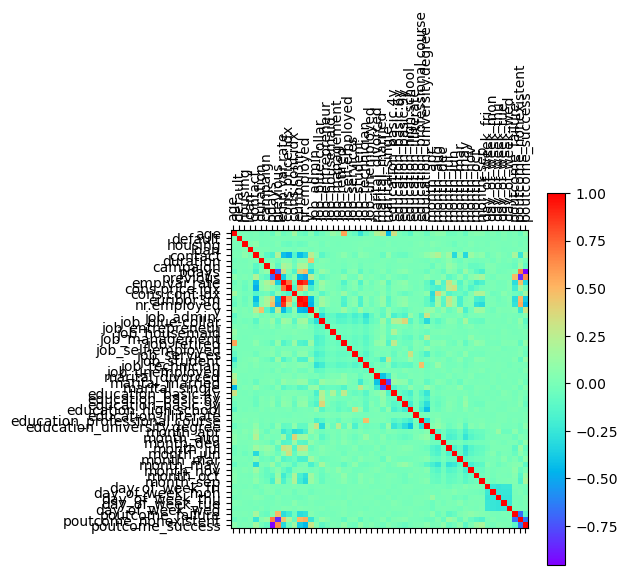

In [81]:
# for drawing this corrolation we use 'matrix show' or matshow method with 'cmap/color map' of spring
plt.matshow(df_balanced.corr(), cmap = "rainbow")


plt.xticks(list(range(len(df_balanced.columns))), df_balanced.columns, rotation = 'vertical')
plt.yticks(list(range(len(df_balanced.columns))), df_balanced.columns, rotation = 'horizontal')

# drawing the colorbor for more information
plt.colorbar()

# showing the chart
plt.show()

In [82]:
# the influence of 'y'
df_balanced.corr()["y"].sort_values(ascending=False)

y                                1.000000
duration                         0.458411
poutcome_success                 0.296602
previous                         0.257405
contact                          0.247988
month_oct                        0.149632
month_mar                        0.146644
month_sep                        0.128882
job_retired                      0.118908
job_student                      0.114510
month_apr                        0.107814
education_university.degree      0.089880
marital_single                   0.085185
month_dec                        0.081224
cons.conf.idx                    0.078911
job_admin.                       0.047304
poutcome_failure                 0.043829
age                              0.037890
day_of_week_thu                  0.028054
job_unemployed                   0.022588
housing                          0.015356
day_of_week_tue                  0.011393
education_illiterate             0.009819
day_of_week_wed                  0

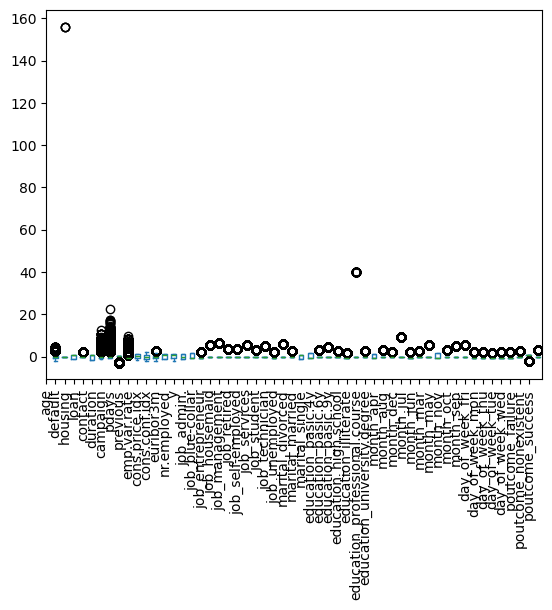

In [83]:
# for finding outliers !!! we use 'plot.box'
df_balanced.plot.box()

plt.xticks(list(range(len(df_balanced.columns))), df_balanced.columns, rotation = 'vertical')

plt.show()

In [84]:
# correlation
df_balanced.corr()

,age,default,housing,loan,contact,duration,campaign,pdays,previous,emp.var.rate,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
age,1.000000,0.001044,0.002749,-0.001043,0.008776,-0.025165,-0.007499,-0.065998,0.065394,-0.052795,...,0.046806,0.038366,-0.009315,0.015199,-0.020652,0.025953,-0.010593,0.013656,-0.059886,0.066845
default,0.001044,1.000000,-0.002838,-0.002675,0.003984,-0.005020,-0.002721,0.002277,0.000190,0.005196,...,-0.001317,-0.001144,-0.003065,-0.003155,-0.003392,0.012820,-0.003200,0.004433,-0.001806,-0.002176
housing,0.002749,-0.002838,1.000000,0.035906,0.069407,-0.013346,-0.007400,-0.015124,0.018105,-0.054305,...,-0.001417,0.001128,-0.009414,0.012637,0.003996,-0.005963,-0.001529,0.011485,-0.018935,0.013664
loan,-0.001043,-0.002675,0.035906,1.000000,0.006555,0.009077,0.007519,-0.005042,-0.004895,0.010563,...,-0.014417,-0.001830,0.000913,0.007061,0.006607,-0.009005,-0.005717,-0.008590,0.007489,-0.001185
contact,0.008776,0.003984,0.069407,0.006555,1.000000,0.016390,-0.108255,-0.161520,0.210511,-0.418969,...,0.040733,0.071886,-0.039193,0.006547,0.043170,0.004165,-0.017141,0.173919,-0.248107,0.154613
duration,-0.025165,-0.005020,-0.013346,0.009077,0.016390,1.000000,-0.025912,0.028194,-0.043182,0.067301,...,-0.028217,-0.012026,-0.000419,-0.028419,0.023858,-0.009556,0.013463,-0.033259,0.047940,-0.030236
campaign,-0.007499,-0.002721,-0.007400,0.007519,-0.108255,-0.025912,1.000000,0.093810,-0.103734,0.196163,...,-0.072184,-0.050267,0.033754,0.029355,-0.009977,-0.023829,-0.027821,-0.063059,0.114799,-0.089692
pdays,-0.065998,0.002277,-0.015124,-0.005042,-0.161520,0.028194,0.093810,1.000000,-0.708704,0.332964,...,-0.122693,-0.184230,0.012707,0.024519,-0.025739,-0.011189,0.001133,0.040788,0.674786,-0.956129
previous,0.065394,0.000190,0.018105,-0.004895,0.210511,-0.043182,-0.103734,-0.708704,1.000000,-0.380971,...,0.112352,0.171924,-0.008013,-0.024742,0.017983,0.011055,0.002674,0.483253,-0.847819,0.644107
emp.var.rate,-0.052795,0.005196,-0.054305,0.010563,-0.418969,0.067301,0.196163,0.332964,-0.380971,1.000000,...,-0.220563,-0.165883,-0.006968,0.007917,-0.022703,-0.011315,0.033738,-0.293351,0.460566,-0.317762


### —🥨Q1: L O G I S T I C - R E G R E S S I O N

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


# standradizationing !

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# making a logistic regression model !

Logisticmodel = LogisticRegression()
Logisticmodel.fit(X_train, y_train)


LogisticRegression()

In [101]:
from sklearn.metrics import accuracy_score, precision_score

# predicting the test data !!!

y_pred_logistic = Logisticmodel.predict(X_test)


accuracy = accuracy_score(y_test, y_pred_logistic)
precision = precision_score(y_test, y_pred_logistic)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')


Accuracy: 0.870998632010944
Precision: 0.8552562070787111


In [102]:
# Analyzing ?

if accuracy > 0.75 and precision > 0.75:
    print("it's a good model !")
else:
    print("it is not a good model !")


it's a good model !


### —🍿Q2: C H E C K I N G  - O N - L O G I S T I C - R E G

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [104]:
conf_matrix = confusion_matrix(y_test, y_pred_logistic)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[6258 1096]
 [ 790 6476]]


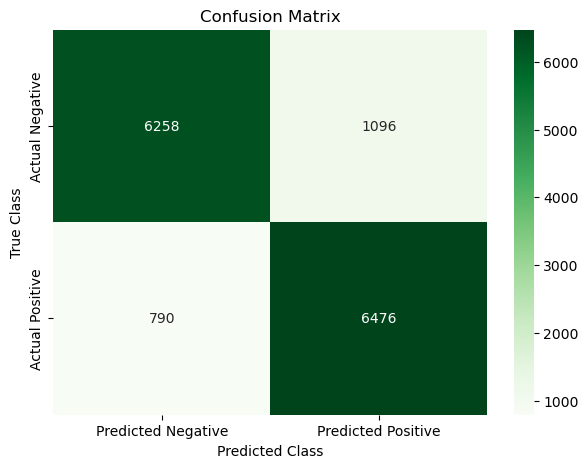

In [105]:
# CM with heatmap !!!

plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Greens', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

In [106]:
# recall & F1
recall = recall_score (y_test, y_pred_logistic)
f1 = f1_score (y_test, y_pred_logistic)

print("Recall:", recall)
print("F1 Score:", f1)

Recall: 0.8912744288466832
F1 Score: 0.8728939210136137


In [107]:
from imblearn.over_sampling import SMOTE

# upsampling my data
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

# training on balanaced data !!!
model_resampled = LogisticRegression()
model_resampled.fit(X_resampled, y_resampled)

# predicting again ?
y_pred_resampled = model_resampled.predict(X_test)

# calculatings 
accuracy_resampled = accuracy_score(y_test, y_pred_resampled)
precision_resampled = precision_score(y_test, y_pred_resampled)
recall_resampled = recall_score(y_test, y_pred_resampled)
f1_resampled = f1_score(y_test, y_pred_resampled)

print(f'Accuracy (Resampled): {accuracy_resampled}')
print(f'Precision (Resampled): {precision_resampled}')
print(f'Recall (Resampled): {recall_resampled}')
print(f'F1 Score (Resampled): {f1_resampled}')


Accuracy (Resampled): 0.870998632010944
Precision (Resampled): 0.8553500660501981
Recall (Resampled): 0.8911368015414258
F1 Score (Resampled): 0.87287678619574


### —🎨Q3: R O C - A U C

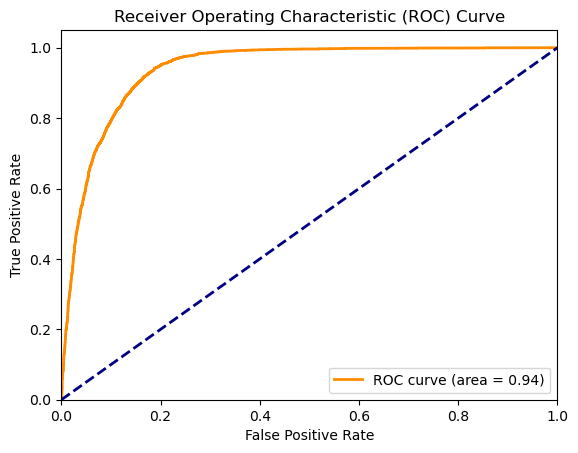

In [122]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# calculating for positive
y_prob = Logisticmodel.predict_proba(X_test)[:, 1]


# calculating ROC points
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
# fpr : false positive rate
# tpr : true positive rate



# calculating AUC
roc_auc = auc(fpr, tpr)



# plotting !
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### —🦓Q4: R I D G E - R E G - G R I D - S E A R C H 

In [109]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# making my ridge reg model with def alpha that is one !!!

ridge_model = Ridge (alpha = 1)
ridge_model.fit(X_train, y_train)

# predicting test data !
y_pred_ridge = ridge_model.predict(X_test)

# mse ?
mse = mean_squared_error(y_test, y_pred_ridge)
print(f'Mean Squared Error (default alpha): {mse}')

Mean Squared Error (default alpha): 0.47792752255789595


In [110]:
from sklearn.model_selection import GridSearchCV

# range for searching for the best alpha ?
alpha_range = {'alpha':  np.logspace (-3, 3, 7) }

# making a new ridge model
ridge = Ridge()

# using GridSearchCV
grid = GridSearchCV ( estimator = ridge_model, param_grid = alpha_range, cv = 5 )
grid.fit(X_train, y_train)

# best alpha and best model using the best alpha
best_alpha = grid.best_params_['alpha']
best_model = grid.best_estimator_

print(f'Best alpha: {best_alpha}')

Best alpha: 1.0


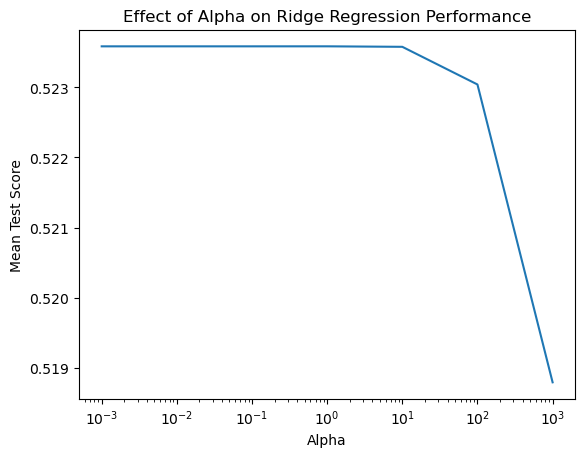

In [111]:
import matplotlib.pyplot as plt

# extracting the results !
results = grid.cv_results_


# plotting !

plt.plot(alpha_range['alpha'], results['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('Mean Test Score')
plt.title('Effect of Alpha on Ridge Regression Performance')
plt.xscale('log')
plt.show()

### —🪼Q5: S V M

In [92]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler

In [93]:
# Assume preprocessed data is already available
X_SVM = df_balanced.drop('y', axis=1)  
y_SVM = df_balanced['y']  

# Split the data into training and testing sets
X_train_SVM, X_test_SVM, y_train_SVM, y_test_SVM = train_test_split(X_SVM, y_SVM, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_SVM = scaler.fit_transform(X_train_SVM)
X_test_SVM = scaler.transform(X_test_SVM)

In [94]:
# Define and train SVM with linear kernel
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train_SVM, y_train_SVM)

# Predict with linear kernel
y_pred_linear = svm_linear.predict(X_test_SVM)

# Evaluate linear kernel
cm_linear = confusion_matrix(y_test_SVM, y_pred_linear)
f1_linear = f1_score(y_test_SVM, y_pred_linear, pos_label=1.0)

print("Confusion Matrix (Linear Kernel):\n", cm_linear)
print("F1 Score (Linear Kernel):", f1_linear)

Confusion Matrix (Linear Kernel):
 [[6140 1214]
 [ 626 6640]]
F1 Score (Linear Kernel): 0.8783068783068783


In [95]:
# Define and train SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train_SVM, y_train_SVM)

# Predict with RBF kernel
y_pred_rbf = svm_rbf.predict(X_test_SVM)

# Evaluate RBF kernel
cm_rbf = confusion_matrix(y_test_SVM, y_pred_rbf)
f1_rbf = f1_score(y_test_SVM, y_pred_rbf, pos_label=1.0)

print("Confusion Matrix (RBF Kernel):\n", cm_rbf)
print("F1 Score (RBF Kernel):", f1_rbf)

Confusion Matrix (RBF Kernel):
 [[6300 1054]
 [ 326 6940]]
F1 Score (RBF Kernel): 0.90956749672346


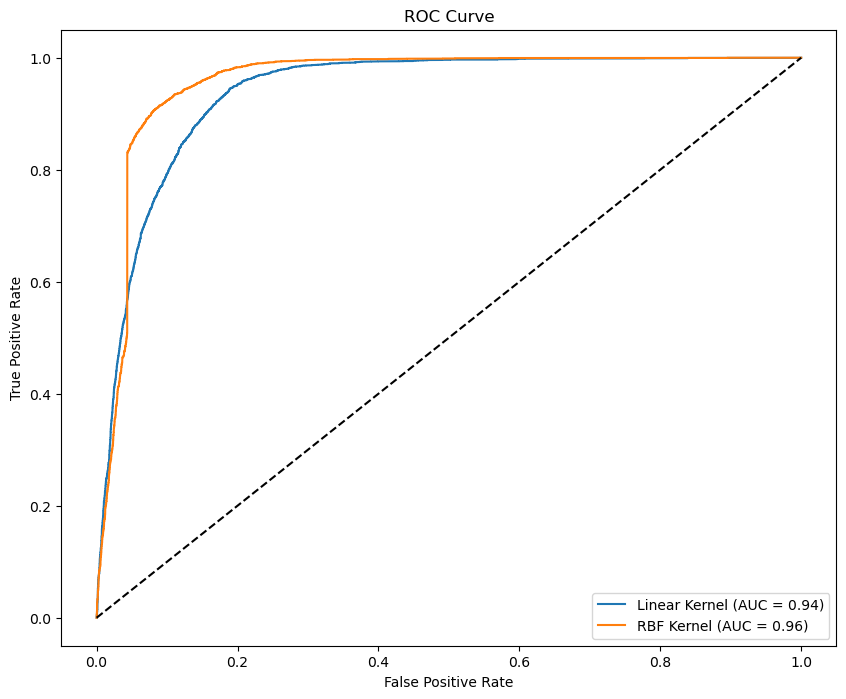

In [96]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# calculating ROC and AUC for linear kernel

fpr_linear, tpr_linear, _ = roc_curve(y_test_SVM, svm_linear.decision_function(X_test_SVM))
auc_linear = roc_auc_score(y_test_SVM, svm_linear.decision_function(X_test_SVM))


# calculating ROC and AUC for RBF kernel

fpr_rbf, tpr_rbf, _ = roc_curve(y_test_SVM, svm_rbf.decision_function(X_test_SVM))
auc_rbf = roc_auc_score(y_test_SVM, svm_rbf.decision_function(X_test_SVM))


# plotting !!

plt.figure(figsize=(10, 8))
plt.plot(fpr_linear, tpr_linear, label='Linear Kernel (AUC = {:.2f})'.format(auc_linear))
plt.plot(fpr_rbf, tpr_rbf, label='RBF Kernel (AUC = {:.2f})'.format(auc_rbf))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

### —🍳Q6: P O L Y - R E G

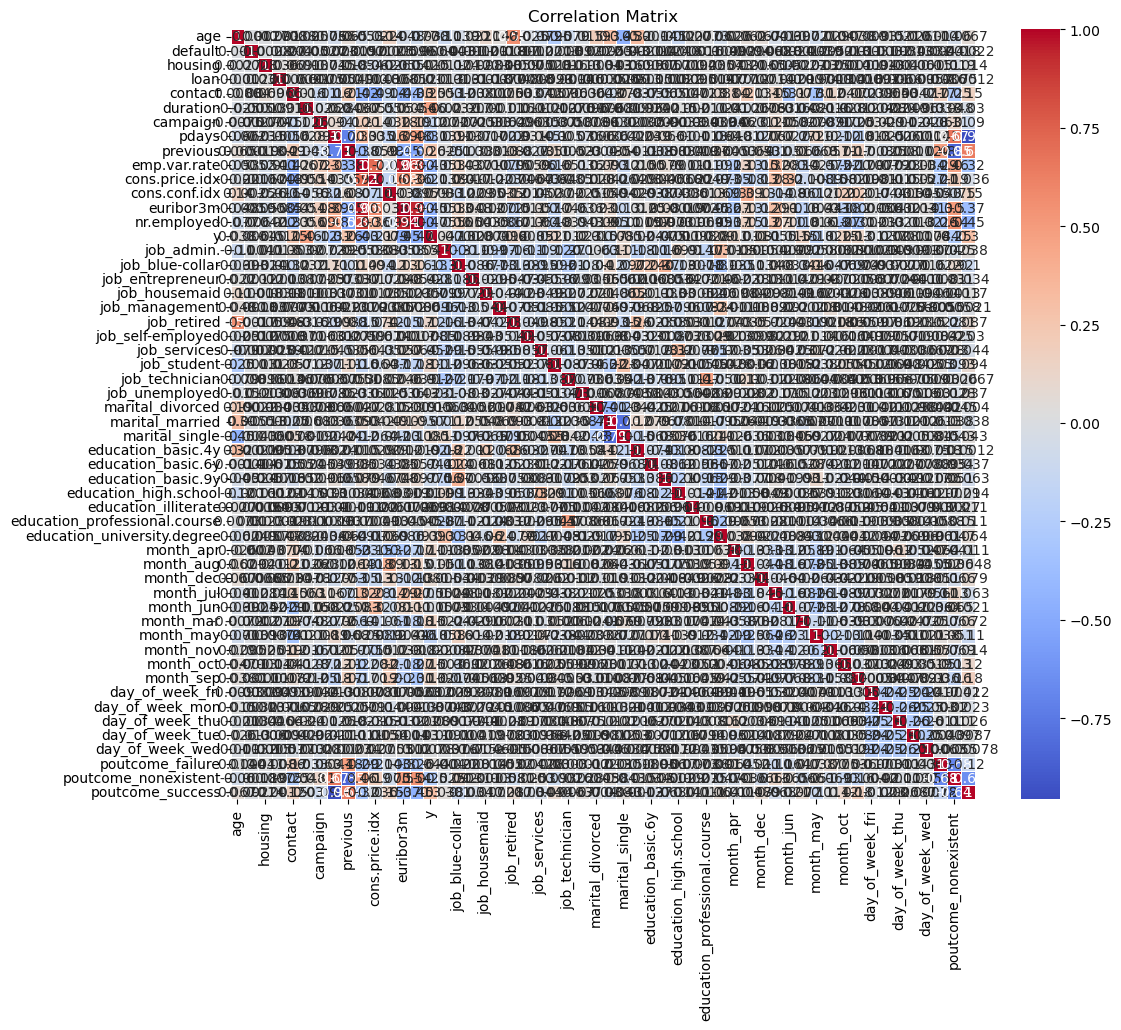

duration                         1.000000
y                                0.458411
emp.var.rate                     0.067301
month_jul                        0.062583
nr.employed                      0.055967
cons.conf.idx                    0.055885
cons.price.idx                   0.054760
euribor3m                        0.053673
month_mar                        0.048287
poutcome_nonexistent             0.047940
previous                         0.043182
poutcome_failure                 0.033259
job_blue-collar                  0.031645
poutcome_success                 0.030236
day_of_week_mon                  0.028419
month_oct                        0.028217
pdays                            0.028194
month_aug                        0.026429
campaign                         0.025912
age                              0.025165
education_basic.6y               0.024138
education_university.degree      0.024037
day_of_week_thu                  0.023858
month_may                        0

In [116]:
# correlation matrix
corr_matrix = df_balanced.corr()

# plotting !!!
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# selecting features with high co-relation !
target_corr = corr_matrix['duration'].abs().sort_values(ascending=False)
print(target_corr)


Degree: 1, MSE: 1.01061811872448
Degree: 2, MSE: 1.005978080577941
Degree: 3, MSE: 1.000334682275218
Degree: 4, MSE: 29220213131149.324
Degree: 5, MSE: 294773746.12298554


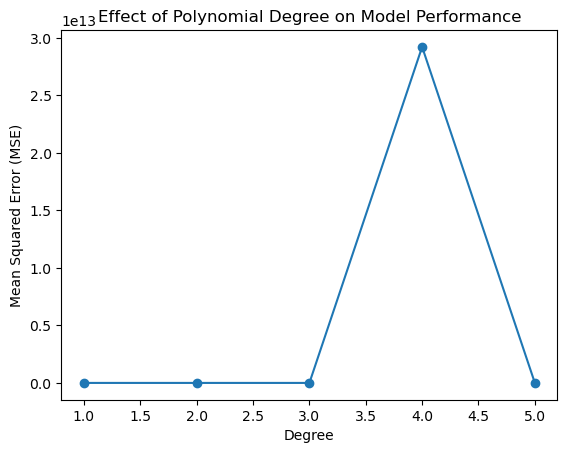

In [117]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error


# making a dict with most important features !!
features = [
    'emp.var.rate', 'month_jul', 'nr.employed', 'cons.conf.idx', 
    'cons.price.idx', 'euribor3m', 'month_mar', 'poutcome_nonexistent',
    'previous', 'poutcome_failure'
]

X_poly = df_balanced [features]
y_poly = df_balanced ['duration']


X_train_p, X_test_p, y_train_p , y_test_p = train_test_split(X_poly, y_poly , test_size=0.2, random_state=42)


# making diffrent degrees regressions !!!
degrees = [1, 2, 3, 4 ,5]
mse_values = []

for degree in degrees:

    Model_poly = PolynomialFeatures(degree = degree)
    X_train_poly = Model_poly.fit_transform(X_train_p)
    X_test_poly = Model_poly.transform(X_test_p)
    
    Linearmodel = LinearRegression()
    Linearmodel.fit(X_train_poly, y_train_p)
    
    y_pred_poly_ridge = Linearmodel.predict(X_test_poly)
    
    # MSE calculating
    mse = mean_squared_error(y_test_p,  y_pred_poly_ridge)
    mse_values.append(mse)
    
    print(f'Degree: {degree}, MSE: {mse}')


# plotting (based on degree & MSE)

plt.plot(degrees, mse_values, marker='o')
plt.xlabel('Degree')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Effect of Polynomial Degree on Model Performance')
plt.show()

### —🧚🏻‍♀️Q8: G R I D S E A R C H - C V - S V M

In [89]:
# since it takes a lot of time let's pick important features !!!!

X_importants = df_balanced[['duration', 'poutcome_success', 'previous', 'contact', 'month_oct',
       'month_mar', 'month_sep', 'job_retired', 'job_student', 'month_apr',
       'campaign', 'job_blue-collar', 'month_may', 'cons.price.idx',
       'poutcome_nonexistent', 'pdays']]

X_train_SVM_GRID, X_test_SVM_GRID , y_train_SVM_GRID, y_test_SVM_GRID = train_test_split(X_importants, y, test_size=0.3, random_state=42)

In [90]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# making my model
SVCRBFmodel = SVC()

# giving parametes for GridSearchCV !!!
param_grid = {
    'C': [1, 10],  
    'gamma': [0.1, 0.01], 
    'kernel': ['rbf']
}

# defining GridSearchCV
grid = GridSearchCV(SVCRBFmodel, param_grid, refit=True, verbose=2)
grid.fit(X_train_SVM_GRID, y_train_SVM_GRID)

print(f"Best Parameters: {grid.best_params_}")

y_predict_svm_rbf = grid.predict(X_test_SVM_GRID)

print(classification_report(y_test_SVM_GRID, y_predict_svm_rbf))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=  37.8s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=  45.1s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=  42.5s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time= 1.1min
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=  33.7s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=  36.6s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=  43.8s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=  35.2s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=  40.1s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=  36.7s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=  43.1s
[CV] END ........................C=10, gamma=0.1,

### —🗂️Q9: C O M P A R I N G - M O D E L S

In [121]:
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

def calculate_metrics(y_true, y_pred):
    metrics = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred, average='macro', zero_division=0),
        'Precision': precision_score(y_true, y_pred, average='macro', zero_division=0),
        'F1-Score': f1_score(y_true, y_pred, average='macro', zero_division=0),
        'AUC': roc_auc_score(y_true, y_pred, average='macro', multi_class='ovo')
    }
    return metrics

y_pred_ridge_binary = (y_pred_ridge > 0.5).astype(int)
y_pred_poly_ridge_binary = (y_pred_poly_ridge > 0.5).astype(int)

metrics_logistic = calculate_metrics(y_test, y_pred_logistic)
metrics_svm_linear = calculate_metrics(y_test, y_pred_linear)
metrics_svm_notlinear = calculate_metrics(y_test, y_pred_rbf)
metrics_ridge = calculate_metrics(y_test, y_pred_ridge_binary)
metrics_poly = calculate_metrics(y_test, y_pred_poly_ridge_binary)

results = pd.DataFrame([metrics_logistic, metrics_svm_linear, metrics_svm_notlinear, metrics_ridge, metrics_poly], 
                       index=['Logistic Regression', 'Linear SVM', 'Non-Linear SVM', 'Ridge Regression', 'Polynomial Regression'])
print(results)

                       Accuracy    Recall  Precision  F1-Score       AUC
Logistic Regression    0.870999  0.871120   0.871584  0.870970  0.871120
Linear SVM             0.874145  0.874383   0.876454  0.873998  0.874383
Non-Linear SVM         0.905609  0.905905   0.909475  0.905428  0.905905
Ridge Regression       0.254241  0.170520   0.310682  0.220188  0.737355
Polynomial Regression  0.006772  0.004542   0.275000  0.008936  0.505385
